# Owkin FL Data Challenge - Exploratory Data Analysis (EDA)
Multiple Myeloma (MM) is a type of bone marrow cancer. Treatment for MM involves  
combinations of drugs over multiple cycles. There is huge heterogeneity in treatment  
response with some individuals not responding to treatment and some patients responding  
well to treatment for some time before a relapse. A better characterization of patients who  
relapse early can influence the treatment options and combinations

## Import libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

from pathlib import Path

In [2]:
# autoreload changes from local files
%load_ext autoreload
%autoreload 2

# pandas show full output
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 200)

# add module path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src import config
from src import preprocess
from src import model
from src import visual
from src import utils

## Load raw datasets

In [4]:
df_clinical_raw = preprocess.load_clinical_data()
df_clinical_raw.head()

,Study,Patient,D_Age,D_Gender,D_OS,D_OS_FLAG,D_PFS,D_PFS_FLAG,D_ISS,PatientType,MA_probeLevelExpFile,MA_probeLevelExpFileSamplId,MA_geneLevelExpFile,MA_geneLevelExpFileSamplId,RNASeq_transLevelExpFile,RNASeq_transLevelExpFileSamplId,RNASeq_geneLevelExpFile,RNASeq_geneLevelExpFileSamplId,WES_mutationFileMutect,WES_mutationFileStrelkaIndel,WES_mutationFileStrelkaSNV,RNASeq_mutationFileMutect,RNASeq_mutationFileStrelkaIndel,RNASeq_mutationFileStrelkaSNV,RNASeq_FusionFile,CYTO_predicted_feature_01,CYTO_predicted_feature_02,CYTO_predicted_feature_03,CYTO_predicted_feature_04,CYTO_predicted_feature_05,CYTO_predicted_feature_06,CYTO_predicted_feature_07,CYTO_predicted_feature_08,CYTO_predicted_feature_09,CYTO_predicted_feature_10,CYTO_predicted_feature_11,CYTO_predicted_feature_12,CYTO_predicted_feature_13,CYTO_predicted_feature_14,CYTO_predicted_feature_15,CYTO_predicted_feature_16,CYTO_predicted_feature_17,CYTO_predicted_feature_18,HR_FLAG
0,MMRF,MMRF_1021,54,Female,1575,0,623,1,1.0,NewlyDiagnosed,NaN,NaN,NaN,NaN,MMRF_CoMMpass_IA9_E74GTF_Salmon_Transcript_TPM...,MMRF_1021_1_BM,MMRF_CoMMpass_IA9_E74GTF_Salmon_entrezID_TPM_h...,MMRF_1021_1_BM,MMRF_1021_1_BM_CD138pos_T2_KAS5U_L02366.MarkDu...,MMRF_1021_1_BM_CD138pos_T2_KAS5U_L02366.MarkDu...,MMRF_1021_1_BM_CD138pos_T2_KAS5U_L02366.MarkDu...,NaN,NaN,NaN,NaN,0,0,1,NaN,0,1,NaN,0,NaN,0.0,NaN,0,0,0,0,0,0,0,FALSE
1,MMRF,MMRF_1029,46,Male,995,0,995,0,1.0,NewlyDiagnosed,NaN,NaN,NaN,NaN,MMRF_CoMMpass_IA9_E74GTF_Salmon_Transcript_TPM...,MMRF_1029_1_BM,MMRF_CoMMpass_IA9_E74GTF_Salmon_entrezID_TPM_h...,MMRF_1029_1_BM,MMRF_1029_1_BM_CD138pos_T2_KAS5U_L02446.MarkDu...,MMRF_1029_1_BM_CD138pos_T2_KAS5U_L02446.MarkDu...,MMRF_1029_1_BM_CD138pos_T2_KAS5U_L02446.MarkDu...,NaN,NaN,NaN,NaN,0,0,1,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0,0,0,0,0,0,FALSE
2,MMRF,MMRF_1030,65,Female,1572,0,1572,0,1.0,NewlyDiagnosed,NaN,NaN,NaN,NaN,MMRF_CoMMpass_IA9_E74GTF_Salmon_Transcript_TPM...,MMRF_1030_1_BM,MMRF_CoMMpass_IA9_E74GTF_Salmon_entrezID_TPM_h...,MMRF_1030_1_BM,MMRF_1030_1_BM_CD138pos_T2_KAS5U_L02445.MarkDu...,MMRF_1030_1_BM_CD138pos_T2_KAS5U_L02445.MarkDu...,MMRF_1030_1_BM_CD138pos_T2_KAS5U_L02445.MarkDu...,NaN,NaN,NaN,NaN,0,0,1,NaN,0,0,NaN,1,NaN,NaN,NaN,0,0,0,1,0,0,0,FALSE
3,MMRF,MMRF_1031,62,Male,1581,0,1329,1,1.0,NewlyDiagnosed,NaN,NaN,NaN,NaN,MMRF_CoMMpass_IA9_E74GTF_Salmon_Transcript_TPM...,MMRF_1031_1_BM,MMRF_CoMMpass_IA9_E74GTF_Salmon_entrezID_TPM_h...,MMRF_1031_1_BM,MMRF_1031_1_BM_CD138pos_T2_TSE61_K02456.MarkDu...,MMRF_1031_1_BM_CD138pos_T2_TSE61_K02456.MarkDu...,MMRF_1031_1_BM_CD138pos_T2_TSE61_K02456.MarkDu...,NaN,NaN,NaN,NaN,0,0,1,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0,0,0,0,0,0,FALSE
4,MMRF,MMRF_1032,76,Male,934,1,908,1,2.0,NewlyDiagnosed,NaN,NaN,NaN,NaN,MMRF_CoMMpass_IA9_E74GTF_Salmon_Transcript_TPM...,MMRF_1032_1_BM,MMRF_CoMMpass_IA9_E74GTF_Salmon_entrezID_TPM_h...,MMRF_1032_1_BM,MMRF_1032_1_BM_CD138pos_T2_TSE61_L00053.MarkDu...,MMRF_1032_1_BM_CD138pos_T2_TSE61_L00053.MarkDu...,MMRF_1032_1_BM_CD138pos_T2_TSE61_L00053.MarkDu...,NaN,NaN,NaN,NaN,0,0,1,NaN,0,0,NaN,1,NaN,NaN,NaN,0,0,0,0,0,0,0,FALSE


In [5]:
df_expression_raw = preprocess.load_expression_data()
df_expression_raw.head()

,Unnamed: 0,MMRF_2490_1_BM,MMRF_2499_1_BM,MMRF_1089_1_BM,MMRF_1778_1_BM,MMRF_1777_1_BM,MMRF_1153_1_BM,MMRF_1392_1_BM,MMRF_1325_1_BM,MMRF_1846_1_BM,MMRF_1935_1_BM,MMRF_1654_1_BM,MMRF_1897_1_BM,MMRF_1682_1_BM,MMRF_2339_1_BM,MMRF_2199_1_BM,MMRF_2118_1_BM,MMRF_2487_1_BM,MMRF_2567_1_BM,MMRF_1738_1_BM,MMRF_1695_1_BM,MMRF_2611_1_BM,MMRF_1537_1_BM,MMRF_2267_1_BM,MMRF_1672_1_BM,MMRF_1715_1_BM,MMRF_2404_1_BM,MMRF_1637_1_BM,MMRF_2412_1_BM,MMRF_1640_1_BM,MMRF_1171_1_BM,MMRF_1851_1_PB,MMRF_2378_1_BM,MMRF_2141_1_BM,MMRF_1261_1_BM,MMRF_1648_1_BM,MMRF_2641_1_BM,MMRF_2314_1_BM,MMRF_2646_1_BM,MMRF_2017_1_BM,MMRF_1188_1_BM,MMRF_2456_1_BM,MMRF_2455_1_BM,MMRF_2019_1_BM,MMRF_1344_1_BM,MMRF_1908_1_BM,MMRF_1383_1_BM,MMRF_1112_3_BM,MMRF_1605_1_BM,MMRF_2409_1_BM,MMRF_1867_1_BM,MMRF_1683_1_BM,MMRF_1720_1_BM,MMRF_1730_1_BM,MMRF_1073_1_BM,MMRF_2461_1_BM,MMRF_2330_1_BM,MMRF_1910_1_BM,MMRF_1539_1_BM,MMRF_2055_1_BM,MMRF_1470_1_BM,MMRF_1086_1_BM,MMRF_2201_1_BM,MMRF_1157_4_BM,MMRF_1773_1_BM,MMRF_2539_1_BM,MMRF_1888_1_BM,MMRF_1583_1_BM,MMRF_1474_1_BM,MMRF_1974_1_BM,MMRF_1793_1_BM,MMRF_1232_4_BM,MMRF_1356_1_BM,MMRF_1893_1_BM,MMRF_1269_1_BM,MMRF_2087_2_BM,MMRF_1256_2_BM,MMRF_2522_1_BM,MMRF_2336_1_BM,MMRF_1080_1_BM,MMRF_1242_1_BM,MMRF_1865_1_BM,MMRF_1408_1_BM,MMRF_1296_1_BM,MMRF_1216_1_BM,MMRF_1808_1_BM,MMRF_1266_1_BM,MMRF_2613_1_BM,MMRF_1485_1_BM,MMRF_1922_1_BM,MMRF_2091_1_BM,MMRF_1314_1_BM,MMRF_2601_1_BM,MMRF_1159_1_BM,MMRF_1824_1_BM,MMRF_1698_1_BM,MMRF_2526_1_BM,MMRF_1722_1_BM,MMRF_1859_1_BM,MMRF_1311_1_BM,...,MMRF_1643_1_BM,MMRF_1639_1_BM,MMRF_1447_1_BM,MMRF_1460_1_BM,MMRF_1229_2_BM,MMRF_2047_1_BM,MMRF_1423_1_BM,MMRF_1038_1_BM,MMRF_2365_1_BM,MMRF_1202_1_BM,MMRF_1466_1_BM,MMRF_1519_1_BM,MMRF_2598_1_BM,MMRF_2637_1_BM,MMRF_1338_1_BM,MMRF_1318_1_BM,MMRF_2013_1_BM,MMRF_1540_1_BM,MMRF_1915_1_BM,MMRF_2310_1_BM,MMRF_1452_1_BM,MMRF_1179_2_BM,MMRF_1577_1_BM,MMRF_2366_1_BM,MMRF_1489_1_BM,MMRF_1212_1_BM,MMRF_1633_1_BM,MMRF_2621_1_BM,MMRF_1137_4_BM,MMRF_2079_1_BM,MMRF_1778_1_PB,MMRF_2224_1_BM,MMRF_1324_1_BM,MMRF_1759_1_BM,MMRF_2506_1_BM,MMRF_2006_1_BM,MMRF_2170_1_BM,MMRF_1496_3_BM,MMRF_2464_1_BM,MMRF_2102_1_BM,MMRF_2419_1_BM,MMRF_1285_1_BM,MMRF_1354_1_BM,MMRF_1857_1_BM,MMRF_1689_1_BM,MMRF_2174_1_BM,MMRF_1783_2_BM,MMRF_1802_1_BM,MMRF_2236_1_BM,MMRF_2187_1_BM,MMRF_1189_1_BM,MMRF_1645_1_BM,MMRF_1024_3_BM,MMRF_1992_1_PB,MMRF_2549_1_BM,MMRF_1931_1_BM,MMRF_1270_1_BM,MMRF_2217_1_BM,MMRF_2399_1_BM,MMRF_1267_1_BM,MMRF_2257_1_BM,MMRF_2505_1_BM,MMRF_1229_3_BM,MMRF_2639_1_BM,MMRF_1797_1_BM,MMRF_1309_2_BM,MMRF_1285_3_BM,MMRF_1598_1_BM,MMRF_2214_1_BM,MMRF_2230_1_BM,MMRF_2413_1_BM,MMRF_2000_1_BM,MMRF_1328_1_BM,MMRF_1451_1_BM,MMRF_1531_1_BM,MMRF_1478_1_BM,MMRF_2253_1_BM,MMRF_1775_1_BM,MMRF_2150_1_BM,MMRF_2488_1_BM,MMRF_1656_1_BM,MMRF_2583_1_BM,MMRF_2272_1_BM,MMRF_2557_1_BM,MMRF_1300_1_BM,MMRF_1425_1_BM,MMRF_2220_1_BM,MMRF_1694_1_BM,MMRF_2143_1_BM,MMRF_1912_1_PB,MMRF_1847_1_BM,MMRF_1787_1_BM,MMRF_1048_1_BM,MMRF_2437_1_BM,MMRF_1242_5_BM,MMRF_1497_1_BM,MMRF_1380_2_BM,MMRF_1700_1_BM,MMRF_1918_1_BM,MMRF_1670_1_BM
0,1,18.391400,15.189000,3.032370,0.584036,25.45150,5.321400,30.233400,20.331900,6.974960,15.087800,13.499600,4.011460,23.798700,25.98940,0.660751,41.89930,19.07880,45.064500,0.264560,2.24493,24.19400,47.283900,0.593017,56.077300,0.098929,4.391990,3.205900,36.669000,0.109408,15.011300,12.642900,12.462200,11.06790,37.186400,0.120342,32.879300,0.049342,31.402000,28.473100,18.43280,0.676623,25.048700,10.651400,44.765500,9.445470,0.041544,19.844000,1.760550,25.937400,59.129300,0.117246,0.670258,0.561156,35.957300,2.039290,34.257700,23.147300,13.293200,30.255500,1.677350,65.765100,20.784100,30.076700,33.521900,21.681800,0.132867,50.384900,31.698900,8.99767,0.795994,1.33602,32.993700,1.67666,26.825000,6.33097,2.190660,45.388500,0.161413,7.861250,0.378535,1.430950,24.402000,22.053300,9.930520,14.26330,21.452500,5.434100,3.793440,22.38730,7.376490,31.808000,0.662124,0.062073,6.392540,18.892800,4.445370,55.873600,19.87420,20.802300,...,2.623050,21.43350,28.120200,5.802510,34.00090,49.96270,34.4

In [6]:
df_dictionary = preprocess.load_dictionary_data()
df_dictionary.head()

,names,category,type,controlled_values,description,MMRF_IA8,GSE15695_UAMS,Hose,UAMS.UK.MyelomaXI,M2GEN,active
0,Patient,id,Character,NaN,Normalized patient identification number.,MMRF_CoMMpass_IA8b_Seq_QC_Summary::Patients..K...,Array number,NaN,"format ""UAMS_0000""",Celgene Pt 1 = “1”,1.0
1,Study,id,Factor,NaN,Study cohort this patient belongs to,MMRF,GSE15695,Hose,"""UAMS""",NaN,1.0
2,Sample_Name,id,Character,NaN,Sample identifier,Parsed from MMRF_CoMMpass_IA8b_Seq_QC_Summary:...,"format=""GSM000000.cel.gz""","paste(""HOSE"", number, sep = ""-"")",NaN,NaN,1.0
3,Controlled_Sample,id,Numeric,"0=""No""; 1=""Yes""",Should this sample/ patient be maintained unde...,NaN,NaN,NaN,NaN,NaN,NaN
4,Visit_Name,id,Character,NaN,"baseline, relapse, etc. Currently not curated ...",MMRF_CoMMpass_IA8b_Seq_QC_Summary::Visits..Rea...,NaN,NaN,NaN,NaN,1.0


On the Synapse website, one can also find a dataset with treatments given to patients that were part of the MMRF cohort. 
Source: https://www.synapse.org/#!Synapse:syn10357367

Some features could be engineered from these columns that are quite likely to improve the prediction performance, for example certain treatments could only be given for high-risk patients. However, since the objective is to develop a model that can be used at moment of diagnosis, we cannot use these features to classify whether someone is high-risk.

In [7]:
df_treatment = pd.read_csv(config.PATH_DATA / 'MMRF_Treatment_Fields.csv')
df_treatment.head()

,Patient,TRT_1_trtgroup,TRT_1_therstdy,TRT_1_therendy,TRT_1_thername,TRT_1_thershnm,TRT_1_therclass,TRT_1_bmtx_rec,TRT_1_bmtx_type,TRT_1_bmtx_n,TRT_1_bmtx_day,TRT_1_bend,TRT_1_bor,TRT_1_car,TRT_1_cyc,TRT_1_dar,TRT_1_dex,TRT_1_dox,TRT_1_doxlip,TRT_1_ixa,TRT_1_len,TRT_1_mel,TRT_1_pom,TRT_1_pred,TRT_1_thal,TRT_1_vin,TRT_1_IMID,TRT_1_other,TRT_1_other_names
0,MMRF_1016,8,1,673,Bortezomib-Cyclophosphamide-Dexamethasone; Bor...,Bor-Cyc-Dex; Bor-Dex; Bor-Len-Cyc-Dex; Bor-Len...,combined bortezomib/IMIDs-based,0,NaN,0,NaN,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,NaN
1,MMRF_1021,1,1,29,Bortezomib-Lenalidomide-Dexamethasone,Bor-Len-Dex,combined bortezomib/IMIDs-based,1,"Stem cell, Autologous",1,NaN,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,NaN
2,MMRF_1024,3,1,582,Bortezomib-Dexamethasone; Lenalidomide-Dexamet...,Bor-Dex; Len-Dex; Thal-Mel-Pred,combined bortezomib/IMIDs-based,0,NaN,0,NaN,0,1,0,0,0,1,0,0,0,1,1,0,1,1,0,1,0,NaN
3,MMRF_1029,6,1,995,Bortezomib-Dexamethasone; Bortezomib-Lenalidom...,Bor-Dex; Bor-Len-Dex; Len; Len-Dex,combined bortezomib/IMIDs-based,0,NaN,0,NaN,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,NaN
4,MMRF_1030,3,1,283,Bortezomib-Lenalidomide-Dexamethasone; Bortezo...,Bor-Len-Dex; Bor-Thal-Mel; Cyc-Dex,combined bortezomib/IMIDs-based,1,"Stem cell, Autologous",2,NaN,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,etoposide


In [8]:
df_treatment_dict = pd.read_csv(config.PATH_DATA / 'MMRF_Treatment_Dict.csv')
df_treatment_dict.head()

,names,class,restrictions,units,description,MMRF.Source
0,TRT_1_trtgroup,numeric,NaN,NaN,number of treatment groups administered during...,STAND_ALONE_TRTRESP::trtgroup
1,TRT_1_therstdy,numeric,NaN,day,Study day of first line therapy start,STAND_ALONE_TRTRESP::trtstdy
2,TRT_1_therendy,numeric,NaN,day,Study day of first line therapy end,STAND_ALONE_TRTRESP::trtendy
3,TRT_1_thername,character,NaN,NaN,Systematic therapy name. Individual drugs trea...,STAND_ALONE_TRTRESP::thername
4,TRT_1_thershnm,character,NaN,NaN,Same as TRT_1_thername column with abbreviated...,STAND_ALONE_TRTRESP::thershnm


## Preprocessed datasets
We process dataset in the following manner.

df_clinical:
- Remove records with HR_FLAG == CENSORED and convert to binary column
- Remove empty columns

In [9]:
df_clinical = preprocess.preprocess_clinical_data(df_clinical_raw)
df_clinical.head()

,Study,Patient,D_Age,D_Gender,D_OS,D_OS_FLAG,D_PFS,D_PFS_FLAG,D_ISS,PatientType,RNASeq_transLevelExpFile,RNASeq_transLevelExpFileSamplId,RNASeq_geneLevelExpFile,RNASeq_geneLevelExpFileSamplId,WES_mutationFileMutect,WES_mutationFileStrelkaIndel,WES_mutationFileStrelkaSNV,CYTO_predicted_feature_01,CYTO_predicted_feature_02,CYTO_predicted_feature_03,CYTO_predicted_feature_05,CYTO_predicted_feature_06,CYTO_predicted_feature_08,CYTO_predicted_feature_10,CYTO_predicted_feature_12,CYTO_predicted_feature_13,CYTO_predicted_feature_14,CYTO_predicted_feature_15,CYTO_predicted_feature_16,CYTO_predicted_feature_17,CYTO_predicted_feature_18,HR_FLAG
0,MMRF,MMRF_1021,54,Female,1575,0,623,1,1.0,NewlyDiagnosed,MMRF_CoMMpass_IA9_E74GTF_Salmon_Transcript_TPM...,MMRF_1021_1_BM,MMRF_CoMMpass_IA9_E74GTF_Salmon_entrezID_TPM_h...,MMRF_1021_1_BM,MMRF_1021_1_BM_CD138pos_T2_KAS5U_L02366.MarkDu...,MMRF_1021_1_BM_CD138pos_T2_KAS5U_L02366.MarkDu...,MMRF_1021_1_BM_CD138pos_T2_KAS5U_L02366.MarkDu...,0,0,1,0,1,0,0.0,0,0,0,0,0,0,0,0
1,MMRF,MMRF_1029,46,Male,995,0,995,0,1.0,NewlyDiagnosed,MMRF_CoMMpass_IA9_E74GTF_Salmon_Transcript_TPM...,MMRF_1029_1_BM,MMRF_CoMMpass_IA9_E74GTF_Salmon_entrezID_TPM_h...,MMRF_1029_1_BM,MMRF_1029_1_BM_CD138pos_T2_KAS5U_L02446.MarkDu...,MMRF_1029_1_BM_CD138pos_T2_KAS5U_L02446.MarkDu...,MMRF_1029_1_BM_CD138pos_T2_KAS5U_L02446.MarkDu...,0,0,1,0,0,0,NaN,0,0,0,0,0,0,0,0
2,MMRF,MMRF_1030,65,Female,1572,0,1572,0,1.0,NewlyDiagnosed,MMRF_CoMMpass_IA9_E74GTF_Salmon_Transcript_TPM...,MMRF_1030_1_BM,MMRF_CoMMpass_IA9_E74GTF_Salmon_entrezID_TPM_h...,MMRF_1030_1_BM,MMRF_1030_1_BM_CD138pos_T2_KAS5U_L02445.MarkDu...,MMRF_1030_1_BM_CD138pos_T2_KAS5U_L02445.MarkDu...,MMRF_1030_1_BM_CD138pos_T2_KAS5U_L02445.MarkDu...,0,0,1,0,0,1,NaN,0,0,0,1,0,0,0,0
3,MMRF,MMRF_1031,62,Male,1581,0,1329,1,1.0,NewlyDiagnosed,MMRF_CoMMpass_IA9_E74GTF_Salmon_Transcript_TPM...,MMRF_1031_1_BM,MMRF_CoMMpass_IA9_E74GTF_Salmon_entrezID_TPM_h...,MMRF_1031_1_BM,MMRF_1031_1_BM_CD138pos_T2_TSE61_K02456.MarkDu...,MMRF_1031_1_BM_CD138pos_T2_TSE61_K02456.MarkDu...,MMRF_1031_1_BM_CD138pos_T2_TSE61_K02456.MarkDu...,0,0,1,0,0,0,NaN,0,0,0,0,0,0,0,0
4,MMRF,MMRF_1032,76,Male,934,1,908,1,2.0,NewlyDiagnosed,MMRF_CoMMpass_IA9_E74GTF_Salmon_Transcript_TPM...,MMRF_1032_1_BM,MMRF_CoMMpass_IA9_E74GTF_Salmon_entrezID_TPM_h...,MMRF_1032_1_BM,MMRF_1032_1_BM_CD138pos_T2_TSE61_L00053.MarkDu...,MMRF_1032_1_BM_CD138pos_T2_TSE61_L00053.MarkDu...,MMRF_1032_1_BM_CD138pos_T2_TSE61_L00053.MarkDu...,0,0,1,0,0,1,NaN,0,0,0,0,0,0,0,0


In [ ]:
df_clinical.

df_expression:
- Transpose dataset: records are samples for each patient and columns are gene measurements. After transposing the dataset can be merged with clinical dataset.

In [10]:
df_expression = preprocess.preprocess_expression_data(df_expression_raw)
df_expression.head()

,SampleID,Entrez_1,Entrez_2,Entrez_3,Entrez_9,Entrez_10,Entrez_13,Entrez_14,Entrez_15,Entrez_16,Entrez_18,Entrez_19,Entrez_20,Entrez_21,Entrez_22,Entrez_23,Entrez_24,Entrez_25,Entrez_26,Entrez_27,Entrez_28,Entrez_29,Entrez_30,Entrez_32,Entrez_33,Entrez_34,Entrez_35,Entrez_36,Entrez_37,Entrez_38,Entrez_39,Entrez_40,Entrez_41,Entrez_43,Entrez_47,Entrez_48,Entrez_49,Entrez_50,Entrez_51,Entrez_52,Entrez_53,Entrez_54,Entrez_55,Entrez_56,Entrez_58,Entrez_59,Entrez_60,Entrez_70,Entrez_71,Entrez_72,Entrez_81,Entrez_86,Entrez_87,Entrez_88,Entrez_89,Entrez_90,Entrez_91,Entrez_92,Entrez_93,Entrez_94,Entrez_95,Entrez_97,Entrez_98,Entrez_100,Entrez_101,Entrez_102,Entrez_103,Entrez_104,Entrez_105,Entrez_107,Entrez_108,Entrez_109,Entrez_111,Entrez_112,Entrez_113,Entrez_114,Entrez_115,Entrez_116,Entrez_117,Entrez_118,Entrez_119,Entrez_120,Entrez_123,Entrez_124,Entrez_125,Entrez_126,Entrez_127,Entrez_128,Entrez_130,Entrez_131,Entrez_132,Entrez_133,Entrez_134,Entrez_135,Entrez_136,Entrez_141,Entrez_142,Entrez_143,Entrez_146,Entrez_147,...,Entrez_252953,Entrez_252955,Entrez_2576,Entrez_26240,Entrez_26267,Entrez_2657,Entrez_26628,Entrez_27183,Entrez_27328,Entrez_284194,Entrez_284366,Entrez_2844,Entrez_286128,Entrez_29940,Entrez_29994,Entrez_3117,Entrez_3222,Entrez_3316,Entrez_344,Entrez_3690,Entrez_3742,Entrez_3753,Entrez_378108,Entrez_378948,Entrez_387104,Entrez_388389,Entrez_3963,Entrez_3987,Entrez_401428,Entrez_414245,Entrez_4253,Entrez_440574,Entrez_440895,Entrez_4701,Entrez_4714,Entrez_50858,Entrez_5098,Entrez_51124,Entrez_51263,Entrez_51326,Entrez_51643,Entrez_51735,Entrez_51750,Entrez_5296,Entrez_53916,Entrez_54949,Entrez_552900,Entrez_55308,Entrez_5683,Entrez_572558,Entrez_57335,Entrez_57497,Entrez_57501,Entrez_582,Entrez_58496,Entrez_5940,Entrez_60677,Entrez_6139,Entrez_641367,Entrez_641517,Entrez_642778,Entrez_645166,Entrez_64788,Entrez_65082,Entrez_653067,Entrez_65988,Entrez_6606,Entrez_6844,Entrez_727856,Entrez_728047,Entrez_728411,Entrez_728734,Entrez_731275,Entrez_7730,Entrez_79086,Entrez_79741,Entrez_80006,Entrez_805,Entrez_80829,Entrez_8190,Entrez_8293,Entrez_8302,Entrez_83864,Entrez_83986,Entrez_84220,Entrez_84342,Entrez_84619,Entrez_84672,Entrez_84673,Entrez_8490,Entrez_84976,Entrez_8509,Entrez_86614,Entrez_8778,Entrez_8926,Entrez_9570,Entrez_9692,Entrez_9720,Entrez_9768,Entrez_9797
0,MMRF_2490_1_BM,18.391400,0.086096,0.0,3.063360,0.0,0.0,77.9576,0.952838,112.5410,0.654753,0.945781,1.68750,0.150855,11.01690,64.42380,0.0,10.74260,0.000000,9.758000,0.000000,0.095033,25.6441,7.355960,0.000000,36.4694,10.95340,9.64508,398.114,44.5067,11.95870,0.0,0.009987,0.012068,32.23330,10.90720,0.045429,71.6975,13.66000,74.8885,27.53100,21.10350,2.325450,0.146094,0.530056,0.845782,478.972,0.000000,517.754,0.000000,141.7230,45.04770,0.112819,0.000000,0.007587,13.09120,2.90008,11.413300,4.044910,0.000000,44.61080,18.89430,14.63790,31.00250,5.88421,34.26730,260.9290,1.841550,0.197193,0.025741,0.002168,13.516500,0.075251,0.006881,17.67500,0.0,0.000000,0.0,0.003334,78.7807,0.015150,36.85200,19.00130,0.042418,0.002705,0.000000,0.019227,47.41740,0.903483,0.0,18.39980,0.096871,0.000000,25.08770,0.030714,4.65714,173.0110,22.78340,0.000000,0.000000,...,0.0,0.0,0.096371,0.003587,8.267639,0.041151,0.006800,26.632450,0.009374,0.040070,0.0,7.095800,5.481696,1.691995,11.023545,0.009790,0.004797,0.086157,0.424044,0.122360,1.341395,0.023435,6.627855,0.0,0.029000,0.442820,0.000000,6.017239,0.000000,3.753195,14.590800,54.425145,0.000000,32.098305,59.107840,0.0,0.032052,26.384816,12.38300,7.513050,48.579322,2.012830,5.986275,5.299982,7.871412,28.000050,88.055300,20.706715,76.289450,0.000000,4.751336,0.0,0.068649,7.021718,4.934252,0.0,0.539370,1218.465230,0.046087,0.0,30.667430,3.747985,4.623100,8.998556,0.765067,2.662900,33.77940,20.88165,0.024688,0.013256,14.852550,0.060922,13.265169,0.404129,35.53015,0.928511,10.153150,150.37610,11.943883,0.023624,7.418340,0.000000,0.0,16.221950,0.729588,17.537550,14.212505,0.0,0.0,6.058870,12.556325,12.214395,0.000000,0.012564,4

df_model: 
- preprocesses and merges df_clinical and df_expression and remove redundant features

In [11]:
df_model = preprocess.create_model_input_data()
df_model.head()

,D_Age,D_Gender,D_ISS,CYTO_predicted_feature_01,CYTO_predicted_feature_02,CYTO_predicted_feature_03,CYTO_predicted_feature_05,CYTO_predicted_feature_06,CYTO_predicted_feature_08,CYTO_predicted_feature_10,CYTO_predicted_feature_12,CYTO_predicted_feature_13,CYTO_predicted_feature_14,CYTO_predicted_feature_15,CYTO_predicted_feature_16,CYTO_predicted_feature_17,CYTO_predicted_feature_18,HR_FLAG,Entrez_1,Entrez_2,Entrez_3,Entrez_9,Entrez_10,Entrez_13,Entrez_14,Entrez_15,Entrez_16,Entrez_18,Entrez_19,Entrez_20,Entrez_21,Entrez_22,Entrez_23,Entrez_24,Entrez_25,Entrez_26,Entrez_27,Entrez_28,Entrez_29,Entrez_30,Entrez_32,Entrez_33,Entrez_34,Entrez_35,Entrez_36,Entrez_37,Entrez_38,Entrez_39,Entrez_40,Entrez_41,Entrez_43,Entrez_47,Entrez_48,Entrez_49,Entrez_50,Entrez_51,Entrez_52,Entrez_53,Entrez_54,Entrez_55,Entrez_56,Entrez_58,Entrez_59,Entrez_60,Entrez_70,Entrez_71,Entrez_72,Entrez_81,Entrez_86,Entrez_87,Entrez_88,Entrez_89,Entrez_90,Entrez_91,Entrez_92,Entrez_93,Entrez_94,Entrez_95,Entrez_97,Entrez_98,Entrez_100,Entrez_101,Entrez_102,Entrez_103,Entrez_104,Entrez_105,Entrez_107,Entrez_108,Entrez_109,Entrez_111,Entrez_112,Entrez_113,Entrez_114,Entrez_115,Entrez_116,Entrez_117,Entrez_118,Entrez_119,Entrez_120,Entrez_123,...,Entrez_252953,Entrez_252955,Entrez_2576,Entrez_26240,Entrez_26267,Entrez_2657,Entrez_26628,Entrez_27183,Entrez_27328,Entrez_284194,Entrez_284366,Entrez_2844,Entrez_286128,Entrez_29940,Entrez_29994,Entrez_3117,Entrez_3222,Entrez_3316,Entrez_344,Entrez_3690,Entrez_3742,Entrez_3753,Entrez_378108,Entrez_378948,Entrez_387104,Entrez_388389,Entrez_3963,Entrez_3987,Entrez_401428,Entrez_414245,Entrez_4253,Entrez_440574,Entrez_440895,Entrez_4701,Entrez_4714,Entrez_50858,Entrez_5098,Entrez_51124,Entrez_51263,Entrez_51326,Entrez_51643,Entrez_51735,Entrez_51750,Entrez_5296,Entrez_53916,Entrez_54949,Entrez_552900,Entrez_55308,Entrez_5683,Entrez_572558,Entrez_57335,Entrez_57497,Entrez_57501,Entrez_582,Entrez_58496,Entrez_5940,Entrez_60677,Entrez_6139,Entrez_641367,Entrez_641517,Entrez_642778,Entrez_645166,Entrez_64788,Entrez_65082,Entrez_653067,Entrez_65988,Entrez_6606,Entrez_6844,Entrez_727856,Entrez_728047,Entrez_728411,Entrez_728734,Entrez_731275,Entrez_7730,Entrez_79086,Entrez_79741,Entrez_80006,Entrez_805,Entrez_80829,Entrez_8190,Entrez_8293,Entrez_8302,Entrez_83864,Entrez_83986,Entrez_84220,Entrez_84342,Entrez_84619,Entrez_84672,Entrez_84673,Entrez_8490,Entrez_84976,Entrez_8509,Entrez_86614,Entrez_8778,Entrez_8926,Entrez_9570,Entrez_9692,Entrez_9720,Entrez_9768,Entrez_9797
0,54,Female,1.0,0,0,1,0,1,0,0.0,0,0,0,0,0,0,0,0,1.91152,1.052220,0.000000,1.32682,0.017741,0.0,21.8491,0.132461,37.7567,0.530183,0.080738,0.141804,0.961001,2.00144,6.06448,0.001373,3.42017,1.988480,1.88296,0.0,0.472959,8.90261,2.161210,0.0,17.3597,2.48858,3.45787,89.2955,13.1171,2.38812,0.000000,0.192276,0.019469,10.16190,2.40884,0.000000,31.7228,4.40584,27.6856,8.08636,1.76793,0.171033,0.023643,0.110831,0.050319,325.280,0.0,172.952,0.022757,32.3042,9.79501,0.342947,0.00668,0.003535,4.07282,1.69488,1.81417,1.086230,0.219925,4.46476,1.436740,11.26340,4.20791,0.240429,11.3392,39.3073,0.500683,0.022496,0.064629,0.614031,1.61732,1.045000,0.459284,7.21686,0.0,0.650564,0.062796,0.021724,17.7313,0.995783,10.64310,6.96452,...,0.0,0.000000,0.632119,0.510625,1.934862,0.021062,0.080846,7.615600,0.019016,0.027905,0.0,1.296815,1.009790,0.193543,4.027437,0.268412,0.000000,0.000000,0.000000,0.047374,0.036188,0.002612,1.018918,0.0,0.085083,0.071193,0.012198,2.297667,1.877080,0.672752,10.89470,20.610440,0.008651,14.19960,21.412693,0.0,0.866740,11.420350,2.17459,0.952630,32.936036,0.756935,0.779276,1.851010,2.490355,7.192255,21.608020,4.170538,26.457540,0.013433,0.669656,0.0,0.028623,1.107405,0.467547,0.0,0.013271,184.478070,0.010782,0.0,6.364438,1.919350,5.961430,2.138259,0.013065,0.655035,7.387795,15.30910,0.049598,0.228129,2.996635,0.108341,1.339705,0.650329,16.540905,0.456176,2.247445,73.67665,3.667881,0.000000,3.441502,0.004281,0.0,1.470760,1.302864,2.273370,3.361188,0.

## Statistics

In [12]:
df_clinical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 570
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Study                            392 non-null    object 
 1   Patient                          392 non-null    object 
 2   D_Age                            392 non-null    int64  
 3   D_Gender                         392 non-null    object 
 4   D_OS                             392 non-null    int64  
 5   D_OS_FLAG                        392 non-null    int64  
 6   D_PFS                            392 non-null    int64  
 7   D_PFS_FLAG                       392 non-null    int64  
 8   D_ISS                            377 non-null    float64
 9   PatientType                      392 non-null    object 
 10  RNASeq_transLevelExpFile         392 non-null    object 
 11  RNASeq_transLevelExpFileSamplId  392 non-null    object 
 12  RNASeq_geneLevelExpFil

Following columns have missing values.

In [13]:
count_missing_values = df_clinical.isnull().sum()
count_missing_values[count_missing_values > 0]

D_ISS                         15
CYTO_predicted_feature_10    221
dtype: int64

For the object columns in the clinical data, we see that only Gender might contain relevant information. The rest is constant or unique.

In [14]:
df_clinical.describe(include='O')

,Study,Patient,D_Gender,PatientType,RNASeq_transLevelExpFile,RNASeq_transLevelExpFileSamplId,RNASeq_geneLevelExpFile,RNASeq_geneLevelExpFileSamplId,WES_mutationFileMutect,WES_mutationFileStrelkaIndel,WES_mutationFileStrelkaSNV
count,392,392,392,392,392,392,392,392,392,392,392
unique,1,392,2,1,1,392,1,392,392,392,392
top,MMRF,MMRF_1021,Male,NewlyDiagnosed,MMRF_CoMMpass_IA9_E74GTF_Salmon_Transcript_TPM...,MMRF_1021_1_BM,MMRF_CoMMpass_IA9_E74GTF_Salmon_entrezID_TPM_h...,MMRF_1021_1_BM,MMRF_1021_1_BM_CD138pos_T2_KAS5U_L02366.MarkDu...,MMRF_1021_1_BM_CD138pos_T2_KAS5U_L02366.MarkDu...,MMRF_1021_1_BM_CD138pos_T2_KAS5U_L02366.MarkDu...
freq,392,1,239,392,392,1,392,1,1,1,1


Statistics and ranges of the numerical columns in the clinical data seem realistic. CYTO columns are binary.

In [50]:
df_clinical.describe()

,D_Age,D_OS,D_OS_FLAG,D_PFS,D_PFS_FLAG,D_ISS,MA_probeLevelExpFile,MA_probeLevelExpFileSamplId,MA_geneLevelExpFile,MA_geneLevelExpFileSamplId,RNASeq_mutationFileMutect,RNASeq_mutationFileStrelkaIndel,RNASeq_mutationFileStrelkaSNV,RNASeq_FusionFile,CYTO_predicted_feature_01,CYTO_predicted_feature_02,CYTO_predicted_feature_03,CYTO_predicted_feature_04,CYTO_predicted_feature_05,CYTO_predicted_feature_06,CYTO_predicted_feature_07,CYTO_predicted_feature_08,CYTO_predicted_feature_09,CYTO_predicted_feature_10,CYTO_predicted_feature_11,CYTO_predicted_feature_12,CYTO_predicted_feature_13,CYTO_predicted_feature_14,CYTO_predicted_feature_15,CYTO_predicted_feature_16,CYTO_predicted_feature_17,CYTO_predicted_feature_18,HR_FLAG
count,392.000000,392.000000,392.000000,392.000000,392.000000,377.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,392.000000,392.000000,392.000000,0.0,392.000000,392.000000,0.0,392.000000,0.0,171.000000,0.0,392.000000,392.000000,392.00000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,63.801020,750.272959,0.244898,642.096939,0.474490,1.986737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250000,0.010204,0.178571,NaN,0.252551,0.165816,NaN,0.104592,NaN,0.023392,NaN,0.002551,0.073980,0.02551,0.125000,0.020408,0.252551,0.089286,0.334184
std,11.418843,328.483674,0.430576,329.583176,0.499987,0.803804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.433566,0.100627,0.383482,NaN,0.435031,0.372391,NaN,0.306418,NaN,0.151588,NaN,0.050508,0.262072,0.15787,0.331142,0.141573,0.435031,0.285520,0.472307
min,27.000000,13.000000,0.000000,13.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.000000,593.250000,0.000000,389.750000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64.000000,725.500000,0.000000,665.500000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,71.000000,952.500000,0.000000,820.250000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250000,0.000000,0.000000,NaN,1.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000
max,93.000000,1581.000000,1.000000,1572.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_clinical.nunique()

When looking at the expression data, we see some potential outliers that, indicated by the standard deviation and by large jumps from 75% quartile to max. These will affect the mean and standard deviation of columns. Depending on the machine learning algorithm you use, this might be something you want to deal with prior to modeling.

In [70]:
df_expression.describe()

,1,2,3,9,10,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,39,40,41,43,47,48,49,50,51,52,53,54,55,56,58,59,60,70,71,72,81,86,87,88,89,90,91,92,93,94,95,97,98,100,101,102,103,104,105,107,108,109,111,112,113,114,115,116,117,118,119,120,123,124,125,126,127,128,130,131,132,133,134,135,136,141,142,143,146,147,148,...,252953,252955,2576,26240,26267,2657,26628,27183,27328,284194,284366,2844,286128,29940,29994,3117,3222,3316,344,3690,3742,3753,378108,378948,387104,388389,3963,3987,401428,414245,4253,440574,440895,4701,4714,50858,5098,51124,51263,51326,51643,51735,51750,5296,53916,54949,552900,55308,5683,572558,57335,57497,57501,582,58496,5940,60677,6139,641367,641517,642778,645166,64788,65082,653067,65988,6606,6844,727856,728047,728411,728734,731275,7730,79086,79741,80006,805,80829,8190,8293,8302,83864,83986,84220,84342,84619,84672,84673,8490,84976,8509,86614,8778,8926,9570,9692,9720,9768,9797
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,...,734.0,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,7.340000e+02,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,15.124962,3.076252,0.005404,1.556980,0.004190,0.000264,32.163988,0.662820,48.541405,0.885164,1.713868,3.679755,1.896365,4.819367,18.790799,0.020360,6.552816,0.928957,2.515444,0.015794,2.668336,24.426355,4.333302,0.007539,23.371804,5.054358,4.444675,306.235566,28.568793,4.891178,0.001137,0.027687,0.683222,14.912318,4.268763,0.008163,37.631495,6.784760,43.729572,17.858124,13.771602,0.226524,0.049100,0.354139,0.445488,505.151637,0.010704,391.799301,0.029357,37.831509,19.760694,1.205568,0.037296,0.088048,4.929961,2.467497,3.859595,1.606410,0.218887,9.359842,5.248220,10.726160,13.876351,6.758865,26.187637,75.273924,1.886762,0.041223,0.840639,0.056009,5.799574,0.603140,2.624889,11.170863,0.012056,0.925403,0.033429,0.023721,32.780041,0.450775,22.081829,8.990598,0.017442,0.016286,0.018354,0.010613,15.820639,0.228201,0.000628,8.726721,42.972666,0.043246,9.56694

In [ ]:
count_missing_values = df_expression.isnull().sum()
count_missing_values[count_missing_values > 0]

## Visualizations

We looking at the most important features in the clinical data, we don't see any strange patterns and distributions in the boxplot or the pairplot. The boxplots suggest some potential outliers, but these seem to be fairly realistic values. If possible, we would like to confirm this with the data owner.

In [61]:
subset = ['D_Age', 'D_Gender', 'D_OS', 'D_OS_FLAG', 'D_PFS', 'D_PFS_FLAG', 'D_ISS', 'HR_FLAG']

<AxesSubplot:>

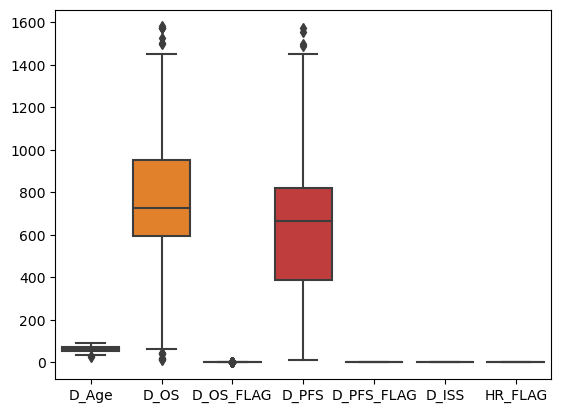

In [64]:
sns.boxplot(df_clinical[subset])

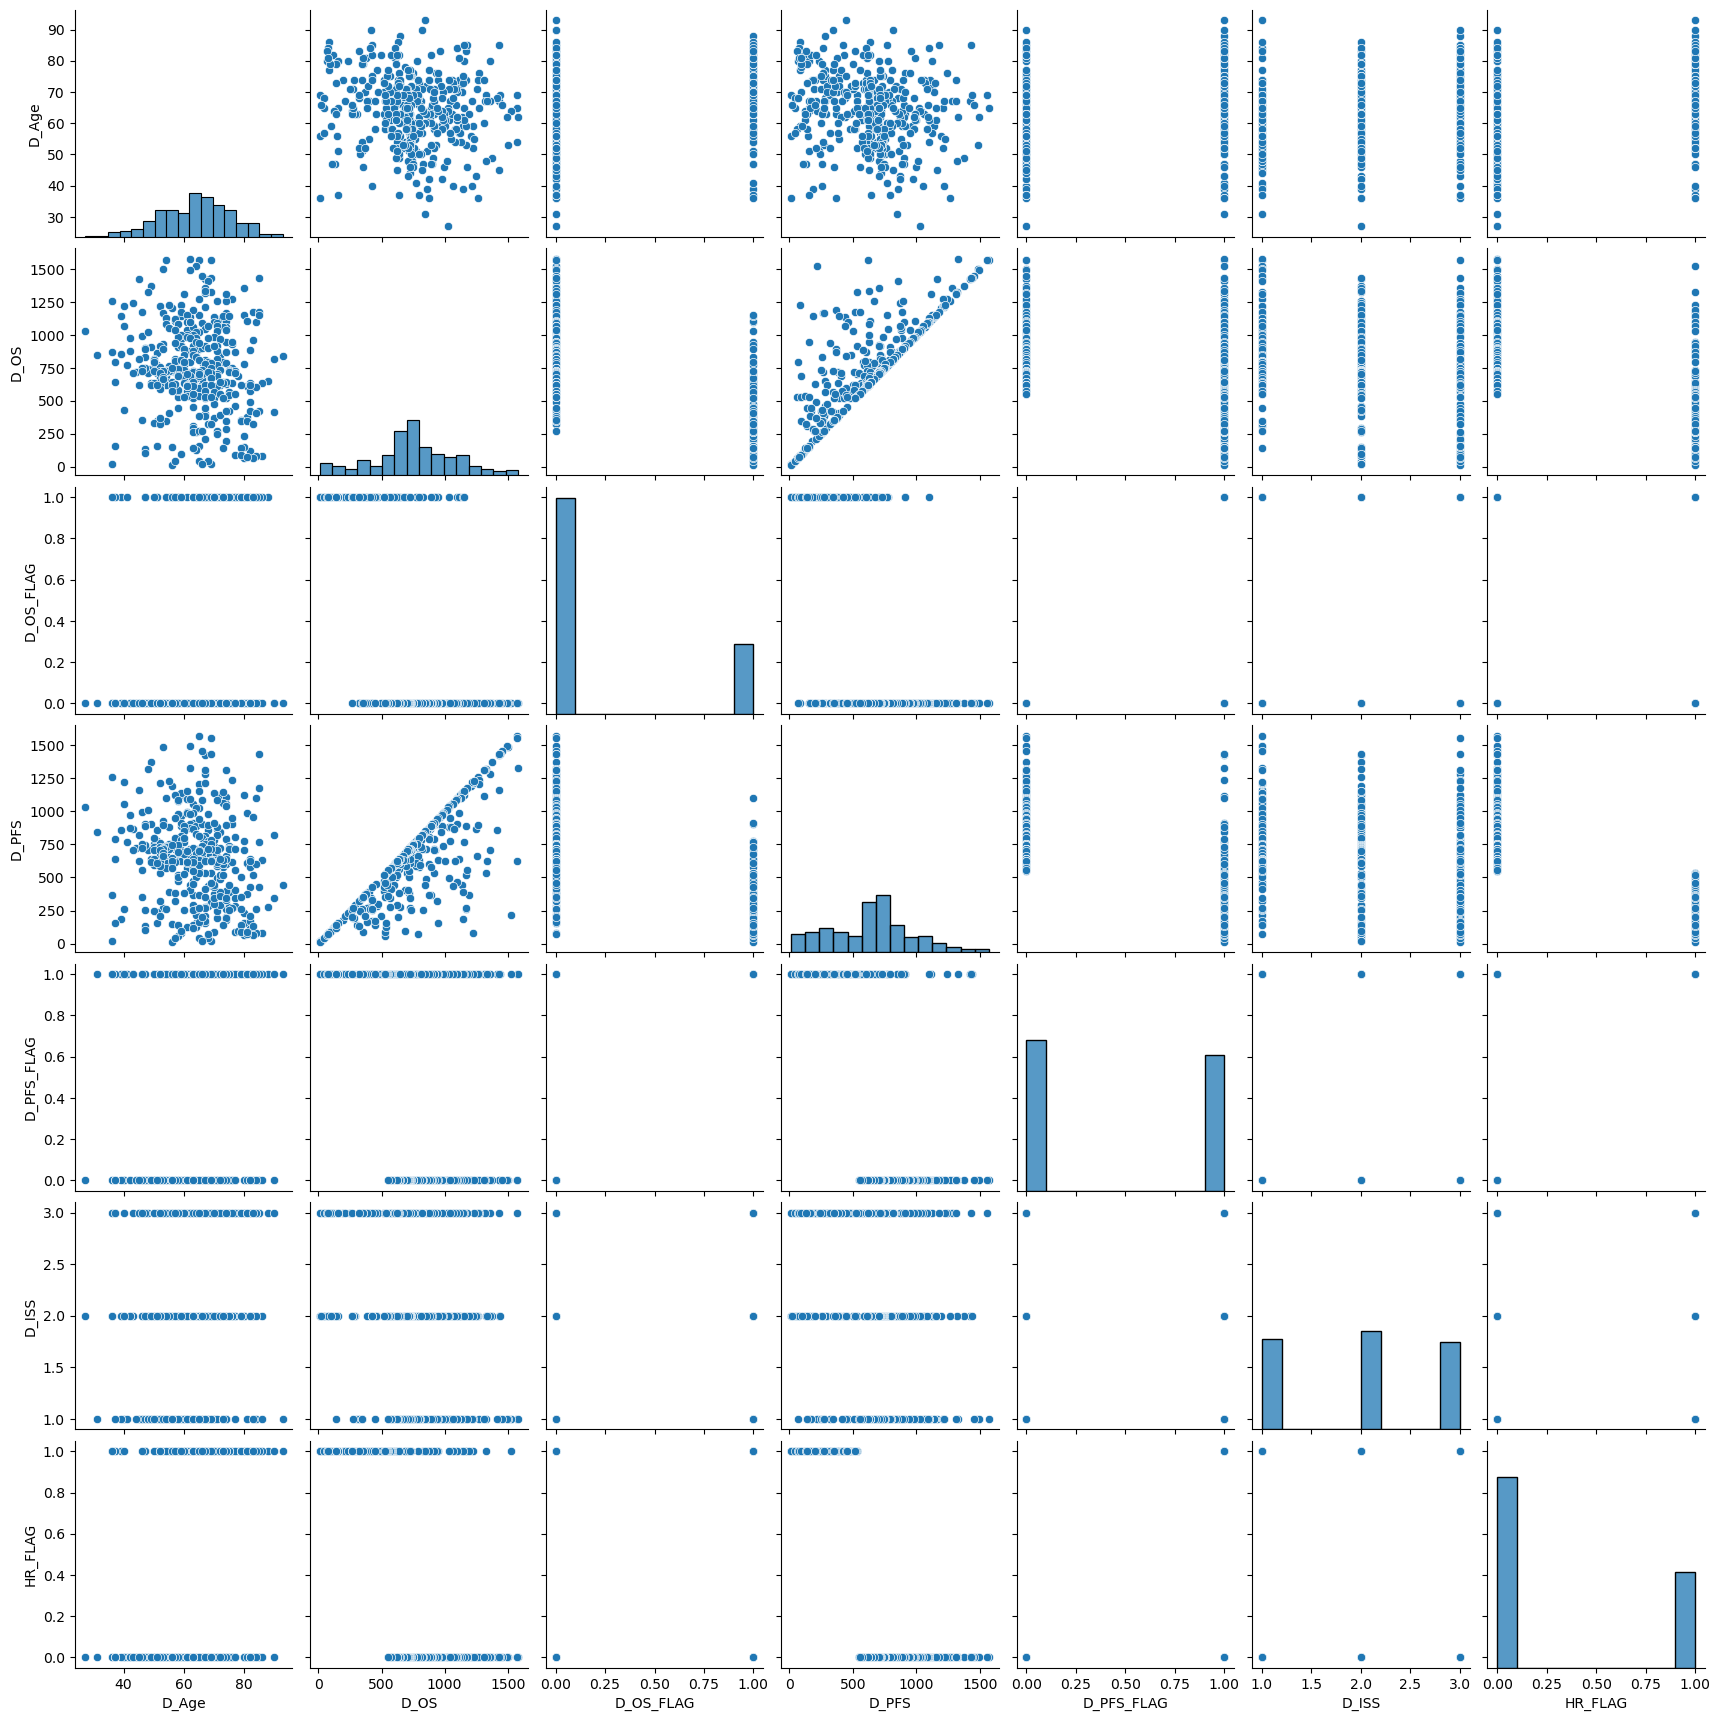

In [63]:
sns.pairplot(df_clinical[subset])

When looking at the correlation between demographic variables and target variable HR_FLAG. We see the following:
- Strong negative correlations for D_OS and D_PFS to target HR_FLAG: as expected, since target is derived from these. These variables are removed prior to modeling.
- Strong positive correaltions for D_OS_FLAG and D_PFS_FLAG to target HR_FLAG: as expected, since death and progression are linked to HR_FLAG, however death and progression could also be unrelated to HR_FLAG. Removal of these features depends on intended usage of model.

<AxesSubplot:>

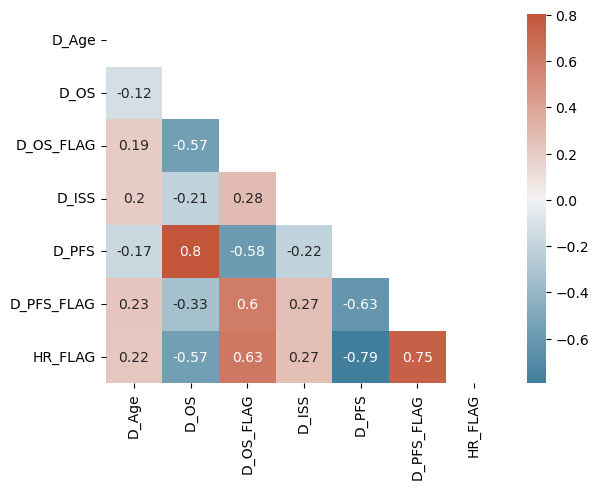

In [26]:
corr_clinical = df_clinical[config.FEATURES_DEMOGRAPHICS + [config.TARGET]].corr()
sns.heatmap(corr_clinical, cmap=sns.diverging_palette(230, 20, as_cmap=True), annot=True, mask=np.triu(np.ones_like(corr_clinical, dtype=bool)))

As df_model has >24k columns, taking a correlation matrix over all features would be too computationally expensive and not very informative. However, we can check the top 25 highest and lowest feature correlations with the target.
- D_OS and D_PFS are removed due to relation to target variable.
- D_PFS_FLAG and D_OS_FLAG clearly have 2x higher correlation then the other variabels. Hence, their presence is likely to have significant impact on the model performance.

In [28]:
df_model.shape

(392, 24152)

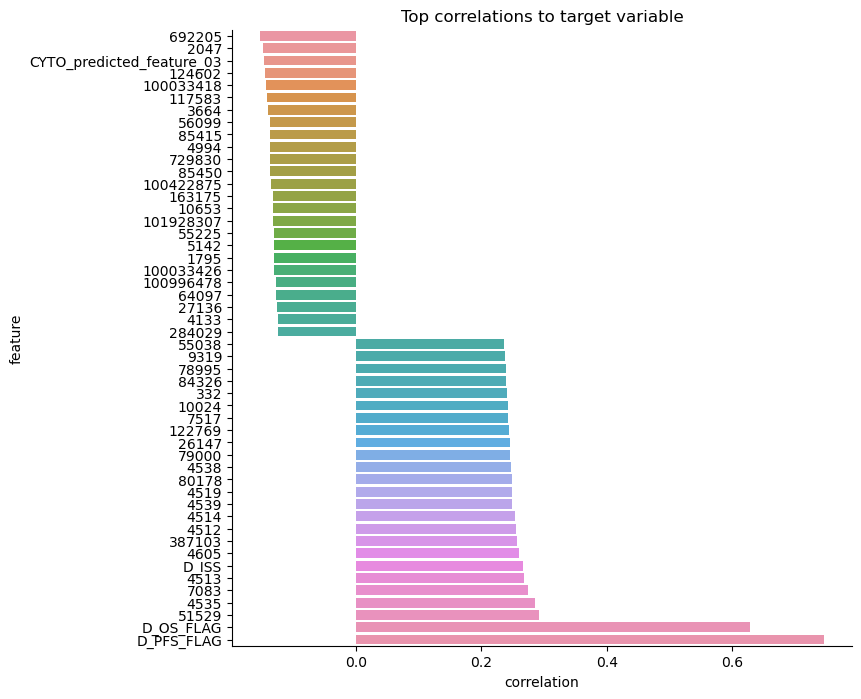

In [45]:
corr_target = utils.corr_with_target(df_model, target_name='HR_FLAG', correlation_method='pearson')
visual.plot_top_corrwith_target(corr_target, n_top=25, n_bottom=25)

In total there are 683 patients in the gene expression data, where 43 patients have more than 1 sample. When we merge the clinical data to the expression, we only merge on one sample per patient and thus lose information about subsequent samples. We could compute statistics based on the changes between the samples and use these as features. However, since only 6% of patients have more than 1 sample, this would result in too many missing values and is likely not worth it.

In [118]:
patient_ids = df_expression.SampleID.apply(lambda x: x.split('_')[1]).rename('PatientID')
hist_n_samples_per_patient = patient_ids.value_counts().value_counts()
print(f'Number of patients with 2 or more samples: {hist_n_samples_per_patient[1:].sum()} / {hist_n_samples_per_patient.sum()}')

Number of patients with 2 or more samples: 43 / 683


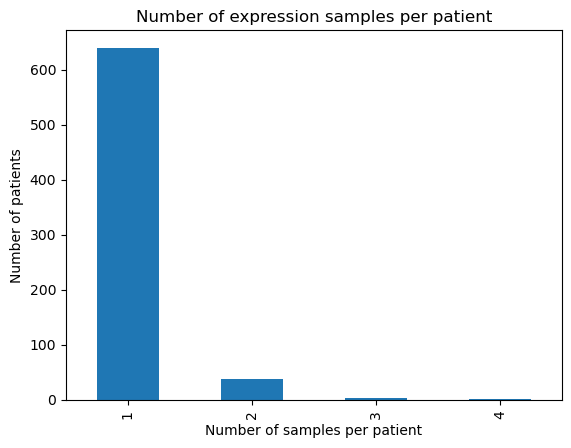

In [117]:
hist_n_samples_per_patient.plot(kind='bar')
plt.title('Number of expression samples per patient')
plt.xlabel('Number of samples per patient')
plt.ylabel('Number of patients')
plt.show()

### Data Dictionary

In [45]:
df_dictionary = pd.read_csv(path_data / 'Harmonized_Clinical_Dictionary.csv')
df_dictionary

,names,category,type,controlled_values,description,MMRF_IA8,GSE15695_UAMS,Hose,UAMS.UK.MyelomaXI,M2GEN,active
0,Patient,id,Character,NaN,Normalized patient identification number.,MMRF_CoMMpass_IA8b_Seq_QC_Summary::Patients..K...,Array number,NaN,"format ""UAMS_0000""",Celgene Pt 1 = “1”,1.0
1,Study,id,Factor,NaN,Study cohort this patient belongs to,MMRF,GSE15695,Hose,"""UAMS""",NaN,1.0
2,Sample_Name,id,Character,NaN,Sample identifier,Parsed from MMRF_CoMMpass_IA8b_Seq_QC_Summary:...,"format=""GSM000000.cel.gz""","paste(""HOSE"", number, sep = ""-"")",NaN,NaN,1.0
3,Controlled_Sample,id,Numeric,"0=""No""; 1=""Yes""",Should this sample/ patient be maintained unde...,NaN,NaN,NaN,NaN,NaN,NaN
4,Visit_Name,id,Character,NaN,"baseline, relapse, etc. Currently not curated ...",MMRF_CoMMpass_IA8b_Seq_QC_Summary::Visits..Rea...,NaN,NaN,NaN,NaN,1.0
5,Sample_Type_Flag,id,Numeric,"0=""Normal""; 1=""NotNormal""",Classify this sample as normal/not normal.,CD138pos parsed from MMRF_CoMMpass_IA8b_Seq_QC...,1,NaN,"ifelse(grepl(""Tumour"",df$Type), ""1"", ""0"")",NaN,1.0
6,Sample_Type,id,Factor,Normal; NotNormal,"Descriptor for sample type, normal, tumor.",CD138pos parsed from MMRF_CoMMpass_IA8b_Seq_QC...,NotNormal,NaN,"ifelse(grepl(""Tumour"",df$Type), ""NotNormal"", ""...",NaN,1.0
7,Sequencing_Type,id,Factor,WES; WGS; RNA-Seq; Targeted,NaN,Parsed from MMRF_CoMMpass_IA8b_Seq_QC_Summary:...,Affymetrix Human Genome U133 Plus 2.0 Array,NaN,"""WES""",NaN,1.0
8,Tissue_Type,id,Character,"PB=""PeripheralBlood""; BM=""BoneMarrow""","eg PB, BM",Parsed from MMRF_CoMMpass_IA8b_Seq_QC_Summary:...,NaN,NaN,"ifelse(grepl(""BM"",df$tissue), ""BM"", ""PB"")",NaN,1.0
9,Cell_Type,id,Character,"Whole=""Unsorted Cells""; CD138pos=""CD138 surfac...",Cell population that was analyzed,Parsed from MMRF_CoMMpass_IA8b_Seq_QC_Summary:...,CD138pos,NaN,"ifelse(grepl(""CD138"",df$tissue), ""CD138pos"", ""...",NaN,1.0
